<a href="https://colab.research.google.com/github/Imran0897/Placement-Assignment_Md_Imran/blob/main/ML_01_Placement_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import re
import os
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [225]:
os.getcwd()

'/content/drive/MyDrive/Placement_Task/ML_01'

In [226]:
os.chdir('/content/drive/MyDrive/Placement_Task/ML_01')

In [227]:
df = pd.read_csv("/content/drive/MyDrive/Placement_Task/ML_01/instagram_reach.csv")

In [228]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [230]:
df['Time since posted'] = df['Time since posted'].apply(lambda x : int((x.split(" "))[0]))

In [231]:
df.dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted     int64
Likes                 int64
dtype: object

In [232]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [233]:
df.dropna(inplace=True)

In [234]:
df.reset_index()

,index,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30
...,...,...,...,...,...,...,...,...,...
89,95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31
90,96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42
91,97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10
92,98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         94 non-null     int64 
 1   S.No               94 non-null     int64 
 2   USERNAME           94 non-null     object
 3   Caption            94 non-null     object
 4   Followers          94 non-null     int64 
 5   Hashtags           94 non-null     object
 6   Time since posted  94 non-null     int64 
 7   Likes              94 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 6.6+ KB


Analyzing Data

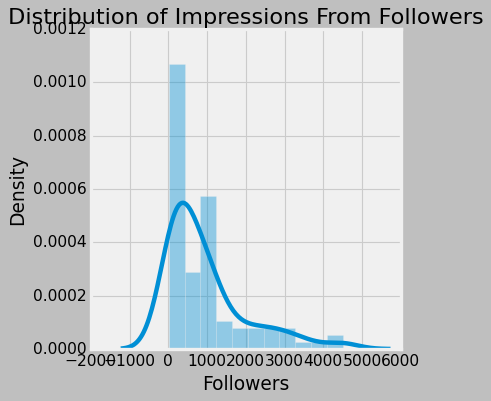

In [236]:
plt.figure(figsize=(5, 5))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.distplot(df['Followers'])
plt.show()

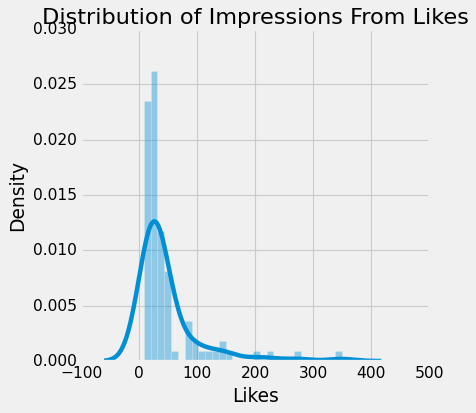

In [237]:
plt.figure(figsize=(5, 5))
plt.title("Distribution of Impressions From Likes")
sns.distplot(df['Likes'])
plt.show()

Relation between Likes and Followers

In [238]:
followers = df["Followers"].sum()
likes = df["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

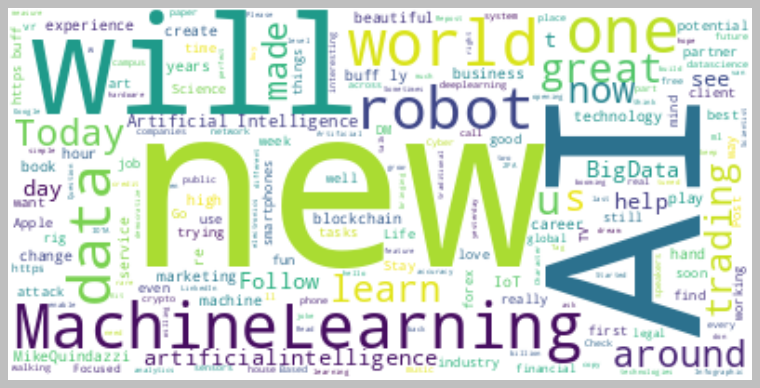

In [239]:
text = " ".join(i for i in df.Caption)
stopwords1 = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords1, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

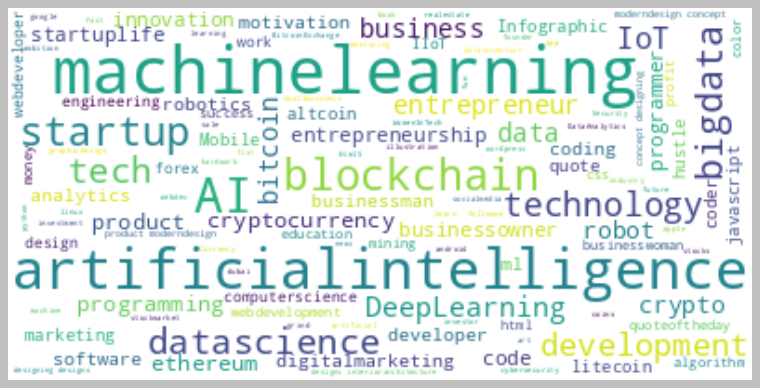

In [240]:
text = " ".join(i for i in df.Hashtags)
stopwords2 = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords2, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [241]:
figure = px.scatter(data_frame = df, x="Likes",
                    y="Followers", trendline="ols", 
                    title = "Relationship Between Likes and Followers")
figure.show()

In [242]:
df.drop(columns=['Unnamed: 0','S.No'],inplace=True)

In [243]:
sentences_username = df['USERNAME'].values

In [244]:
len(sentences_username)

94

In [245]:
sentences_Hashtags = df['Hashtags'].values

In [246]:
sentences_Caption = df['Caption'].values

In [247]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [248]:
def clean_text_p(text):
    # Remove special characters and hashtags
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    cleaned_text = re.sub(r'#\w+', '', cleaned_text)
    
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    review = cleaned_text.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review.strip()


In [249]:
corpus_Hashtags = []
for i in range(0,len(df)):
  corpus_Hashtags.append(clean_text_p(sentences_Hashtags[i]))

In [250]:
corpus_Hashtags

['machinelearn ai dataanalyt datascienc datalak',
 'deck mac macintoshsayhello appl stevejob ai evolutionartificialintellig machinelearningtermin illbeback technologycomputerevolut computersciencesciencefictioncomputersciencetosciencefictiontomorrowstechnolog vr ar robotrobot t2 businessdeck businessslidesillustr sketch draw',
 'whoiswho aitrad ai aitradingteaminstateam instapeopl ai tradingartificialintellig cryptocryptocurr blockchain tradingforexforex fiatmoney coin machinelearninguserexperi instamachinelearninginstabigdata instamarketingartificialintellig deeplearningdatasci industri marketingbigdata datasci machinelearningml',
 'iot creworkplac cdo bigdata technologytech work computersci blockchainsoftwaredevelop machinelearningsmartc artificialintelligencefutureofwork opensourc cybersecurityai softwareengin engineeringsmartc develop autonomoussingular webdevelopercryptocurr programm cryptoiiot robot',
 'instamachinelearn instabigdatainstamarket artificialintelligenceindustri deep

In [251]:
corpus_Caption = []
for i in range(0,len(df)):
  corpus_Caption.append(clean_text_p(sentences_Caption[i]))

In [252]:
corpus_Caption

['datascientist mikequindazzi machinelearn ai dataanalyt datascienc datalak httpsbuffly2kymf0',
 'know go workrespons postpon date actual made busi slide deck mac macintoshsayhello appl stevejob ai evolutionartificialintellig machinelearningtermin illbeback technologycomputerevolut computersciencesciencefictioncomputersciencetosciencefictiontomorrowstechnolog vr ar robotrobot t2 businessdeck businessslidesillustr sketch draw',
 'alexand barinov 4 year cfo multin 10 year experi financi advisori deloitt ey 6 partner focus strateg manag financ legal complianc work global corpor includ publicli trade compani 5 year experi trade nyse lse exchang whoiswho aitrad ai aitradingteaminstateam instapeopl ai tradingartificialintellig cryptocryptocurr blockchain tradingforexforex fiatmoney coin machinelearninguserexperi instamachinelearninginstabigdata instamarketingartificialintellig deeplearningdatasci industri marketingbigdata datasci machinelearningml',
 'sfad',
 'ever miss call phone charg syst

In [253]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v_1=TfidfVectorizer(max_features=50,ngram_range=(1,3))

tfidf_v_2=TfidfVectorizer(max_features=50,ngram_range=(1,3))

X_Caption=tfidf_v_1.fit_transform(corpus_Caption).toarray()

In [254]:
X_Caption

array([[0.45288527, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39098847, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.397342  , 0.        , 0.        , ..., 0.        , 0.25642192,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [255]:
tfidf_v_1.get_feature_names_out()[:20]

array(['ai', 'around', 'around world', 'art', 'artifici',
       'artifici intellig', 'beauti', 'blockchain', 'book', 'busi',
       'career', 'chang', 'creat', 'data', 'day', 'experi', 'featur',
       'follow', 'get', 'go'], dtype=object)

In [256]:
tfidf_v_1.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 50,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [257]:
df_Caption = pd.DataFrame(X_Caption, columns=tfidf_v_1.get_feature_names_out())

In [258]:
df_Caption.head(2)

,ai,around,around world,art,artifici,artifici intellig,beauti,blockchain,book,busi,...,talk,technolog,today,trade,tri,tv,us,walk,work,world
0,0.452885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.390988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.504643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
X_Hashtags=tfidf_v_2.fit_transform(corpus_Hashtags).toarray()

In [260]:
X_Hashtags

array([[0.69164867, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53851604, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75029088, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.72363302]])

In [261]:
tfidf_v_2.get_feature_names_out()[:20]

array(['ai', 'ai artificialintellig', 'analyt', 'appl', 'art',
       'artificialintellig', 'bigdata', 'bitcoin', 'blockchain', 'busi',
       'code', 'coder', 'concept', 'crypto', 'css', 'data', 'datasci',
       'deeplearn', 'design', 'designingdesign'], dtype=object)

In [262]:
tfidf_v_2.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 50,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [263]:
k = []
for i in tfidf_v_2.get_feature_names_out():
  if i in tfidf_v_1.get_feature_names_out():
    k.append(i)

In [264]:
k

['ai',
 'art',
 'blockchain',
 'busi',
 'data',
 'learn',
 'machinelearn',
 'robot',
 'technolog',
 'work']

In [265]:
col_hash = []
for i in tfidf_v_2.get_feature_names_out():
  if i in k:
    col_hash.append(i+"hash")
  else:
    col_hash.append(i)


In [266]:
col_hash

['aihash',
 'ai artificialintellig',
 'analyt',
 'appl',
 'arthash',
 'artificialintellig',
 'bigdata',
 'bitcoin',
 'blockchainhash',
 'busihash',
 'code',
 'coder',
 'concept',
 'crypto',
 'css',
 'datahash',
 'datasci',
 'deeplearn',
 'design',
 'designingdesign',
 'develop',
 'dubai',
 'entrepreneur',
 'ethereum',
 'forex',
 'html',
 'infograph',
 'innov',
 'iot',
 'javascript',
 'learnhash',
 'litecoin',
 'machinelearnhash',
 'mine',
 'mobil',
 'money',
 'motiv',
 'product',
 'programm',
 'quot',
 'robothash',
 'softwar',
 'softwareengin',
 'startup',
 'stockmarket',
 'success',
 'tech',
 'technologhash',
 'webdevelop',
 'workhash']

In [267]:
df_Hashtags = pd.DataFrame(X_Hashtags, columns=col_hash)

In [268]:
df_Hashtags.head(2)

,aihash,ai artificialintellig,analyt,appl,arthash,artificialintellig,bigdata,bitcoin,blockchainhash,busihash,...,robothash,softwar,softwareengin,startup,stockmarket,success,tech,technologhash,webdevelop,workhash
0,0.691649,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.538516,0.0,0.0,0.842615,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [270]:
df.drop(columns=['USERNAME','Caption','Hashtags'],inplace = True)

In [271]:
df_final = pd.concat([df_Caption,df_Hashtags,df],axis = 1)

In [272]:
df_final.head()

,ai,around,around world,art,artifici,artifici intellig,beauti,blockchain,book,busi,...,startup,stockmarket,success,tech,technologhash,webdevelop,workhash,Followers,Time since posted,Likes
0,0.452885,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1600.0,11.0,139.0
1,0.390988,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.504643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,880.0,2.0,23.0
2,0.397342,0.000000,0.0,0.0,0.0,0.0,0.0,0.268849,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,255.0,2.0,25.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.400715,340.0,3.0,49.0
4,0.000000,0.460061,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,304.0,3.0,30.0


In [273]:
df_final['around'].dtypes

dtype('float64')

In [274]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 103 entries, ai to Likes
dtypes: float64(103)
memory usage: 80.6 KB


In [275]:
df_final.isnull().sum()

ai                   6
around               6
around world         6
art                  6
artifici             6
                    ..
webdevelop           6
workhash             6
Followers            6
Time since posted    6
Likes                6
Length: 103, dtype: int64

In [276]:
df_final.dropna(inplace=True)

In [277]:
X = df_final.drop(columns= ['Time since posted','Likes'])

In [286]:
X

,ai,around,around world,art,artifici,artifici intellig,beauti,blockchain,book,busi,...,softwar,softwareengin,startup,stockmarket,success,tech,technologhash,webdevelop,workhash,Followers
0,0.452885,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1600.0
1,0.390988,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.504643,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,880.0
2,0.397342,0.000000,0.0,0.0,0.0,0.0,0.0,0.268849,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,255.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.423384,0.0,0.0,0.0,0.0,0.0,0.000000,0.400715,340.0
4,0.000000,0.460061,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.665152,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.588008,0.000000,1158.0
90,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.298027,0.298027,863.0
91,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.922851,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,971.0
92,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,106.0


In [287]:
y = df_final[['Time since posted','Likes']]

In [288]:
y

,Time since posted,Likes
0,11.0,139.0
1,2.0,23.0
2,2.0,25.0
3,3.0,49.0
4,3.0,30.0
...,...,...
88,2.0,29.0
90,2.0,32.0
91,2.0,46.0
92,2.0,12.0


In [289]:
from sklearn.model_selection import train_test_split

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization of data

In [291]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [292]:
X_train=scaler.fit_transform(X_train)

In [293]:
X_test=scaler.transform(X_test)

In [301]:
X_test

array([[-0.37761981, -0.27351726, -0.24470726, ..., -0.12038585,
        -0.16465055, -0.78056329],
       [ 3.11882779, -0.27351726, -0.24470726, ..., -0.12038585,
        -0.16465055,  0.54793338],
       [-0.37761981, -0.27351726, -0.24470726, ..., -0.12038585,
        -0.16465055, -0.66682213],
       ...,
       [-0.37761981, -0.27351726, -0.24470726, ..., -0.12038585,
         3.24495124,  0.92464408],
       [-0.37761981, -0.27351726, -0.24470726, ..., -0.12038585,
        -0.16465055, -0.35289655],
       [-0.37761981, -0.27351726, -0.24470726, ..., -0.12038585,
        -0.16465055, -0.82514982]])

In [294]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [304]:
# linear regression for multioutput regression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define model
model = XGBRegressor()
# fit model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [307]:
y_pred = model.predict(X_test)

In [308]:
y_pred

array([[  8.41338  ,  72.68752  ],
       [ 13.998013 , 111.60867  ],
       [  4.675628 ,  22.1213   ],
       [  2.1030626,  45.78785  ],
       [  2.1909397,   6.819247 ],
       [  2.1032462,  45.329098 ],
       [  2.0005004,  23.221327 ],
       [  3.677151 ,  27.485819 ],
       [  2.0441413,  29.091143 ],
       [  2.059127 ,  49.589993 ],
       [  2.1032462,  46.3526   ],
       [  2.0000288,  18.222668 ],
       [  2.0750494,  37.73661  ],
       [  4.895584 ,  35.215054 ],
       [  2.1043887,  39.413074 ],
       [ 17.742735 , 269.77643  ],
       [  2.0108864,  25.566055 ],
       [  1.995896 ,  15.740397 ]], dtype=float32)

In [ ]:
r2_score(y_test,y_pred)

New Data Prediction

In [310]:
# make a prediction
model.predict(X_test[0].reshape(1,-1))

array([[ 8.41338, 72.68752]], dtype=float32)

Pickling The Model file For Deployment

In [311]:
pickle.dump(model,open('xgb_model.pkl','wb'))

In [312]:
pickled_model=pickle.load(open('xgb_model.pkl','rb'))

In [314]:
#Prediction by pickel model

In [313]:
pickled_model.predict(scaler.transform(X_test[0].reshape(1,-1)))

array([[ 9.089662, 69.9862  ]], dtype=float32)